<a href="https://colab.research.google.com/github/arnavkekre/hackathon/blob/main/student_recommendation_and_visaus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [150]:
df=pd.read_csv('/content/adaptive_learning_dataset_2000.csv')
df

,student_id,age,gender,location,subject,difficulty_level,time_spent_minutes,attempts,accuracy,hints_used,previous_score,engagement_level,performance_label
0,S0001,17,Female,Rural,Science,Medium,38,1,70.48,No,76.74,Medium,Average
1,S0002,11,Male,Semi-urban,English,Medium,27,5,68.20,No,63.15,Medium,Average
2,S0003,14,Male,Urban,Science,Easy,25,5,96.10,Yes,45.48,Medium,Struggling
3,S0004,17,Male,Urban,Science,Easy,36,2,60.61,Yes,57.78,High,Average
4,S0005,12,Male,Semi-urban,Science,Hard,31,2,92.08,No,89.71,Low,Advanced
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,S1996,14,Male,Urban,Math,Hard,45,5,91.51,No,94.17,Medium,Advanced
1996,S1997,12,Male,Rural,Math,Hard,37,4,53.96,Yes,70.01,Medium,Average
1997,S1998,10,Female,Semi-urban,Math,Hard,32,3,67.10,No,59.58,High,Average
1998,S1999,13,Female,Rural,Math,Medium,16,4,96.22,No,75.67,Low,Average


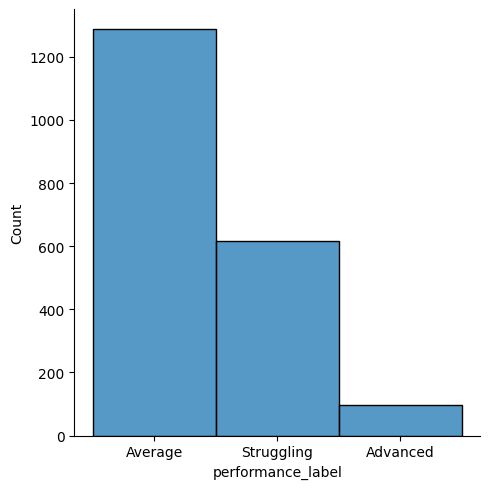

In [151]:
sns.displot(df,x='performance_label',kind='hist')

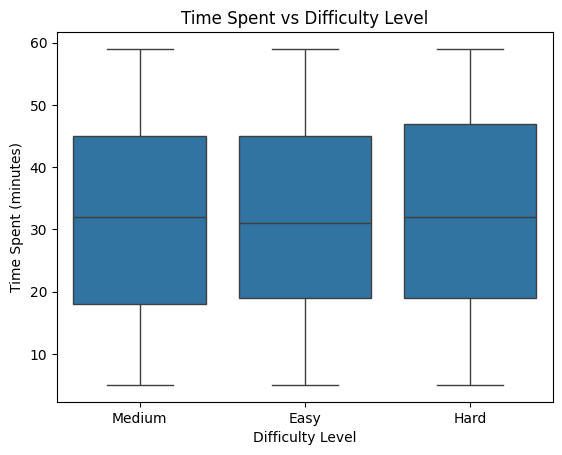

In [152]:
sns.boxplot(x='difficulty_level', y='time_spent_minutes', data=df)
plt.title('Time Spent vs Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Time Spent (minutes)')
plt.show()

In [153]:
X=df.drop(columns=['performance_label', 'student_id'])
y=df['performance_label']

In [154]:
X.head(2)

,age,gender,location,subject,difficulty_level,time_spent_minutes,attempts,accuracy,hints_used,previous_score,engagement_level
0,17,Female,Rural,Science,Medium,38,1,70.48,No,76.74,Medium
1,11,Male,Semi-urban,English,Medium,27,5,68.20,No,63.15,Medium


In [155]:
y.head(10)

,performance_label
0,Average
1,Average
2,Struggling
3,Average
4,Advanced
5,Average
6,Average
7,Average
8,Average
9,Average


In [156]:
X.describe()

,age,time_spent_minutes,attempts,accuracy,previous_score
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,13.49900,31.972000,3.023000,69.083455,64.752380
std,2.28136,15.692047,1.385435,19.414302,15.061028
min,10.00000,5.000000,1.000000,0.000000,13.370000
25%,11.00000,19.000000,2.000000,55.947500,54.827500
50%,14.00000,32.000000,3.000000,69.255000,64.565000
75%,15.00000,46.000000,4.000000,83.855000,75.222500
max,17.00000,59.000000,5.000000,100.000000,100.000000


<Axes: >

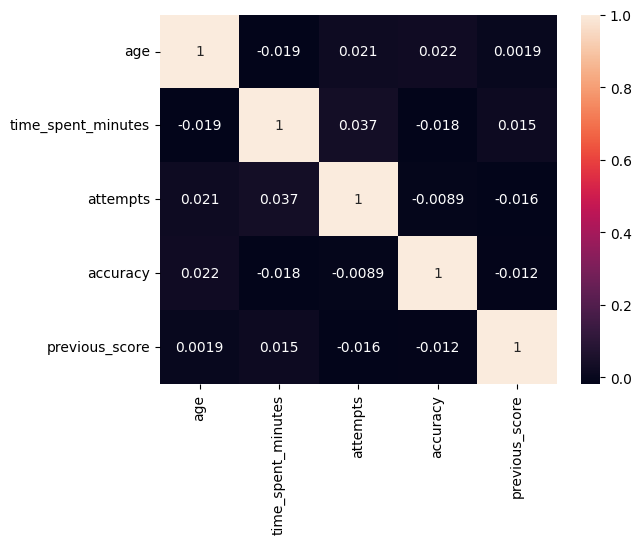

In [157]:
numeric_df = df.drop(columns=['student_id', 'gender', 'location', 'subject', 'difficulty_level', 'hints_used', 'engagement_level', 'performance_label'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True)

In [158]:
X = pd.get_dummies(data=X, columns=['gender', 'location', 'subject', 'difficulty_level', 'engagement_level', 'hints_used'])

In [159]:
X

,age,time_spent_minutes,attempts,accuracy,previous_score,gender_Female,gender_Male,location_Rural,location_Semi-urban,location_Urban,...,subject_Math,subject_Science,difficulty_level_Easy,difficulty_level_Hard,difficulty_level_Medium,engagement_level_High,engagement_level_Low,engagement_level_Medium,hints_used_No,hints_used_Yes
0,17,38,1,70.48,76.74,True,False,True,False,False,...,False,True,False,False,True,False,False,True,True,False
1,11,27,5,68.20,63.15,False,True,False,True,False,...,False,False,False,False,True,False,False,True,True,False
2,14,25,5,96.10,45.48,False,True,False,False,True,...,False,True,True,False,False,False,False,True,False,True
3,17,36,2,60.61,57.78,False,True,False,False,True,...,False,True,True,False,False,True,False,False,False,True
4,12,31,2,92.08,89.71,False,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,14,45,5,91.51,94.17,False,True,False,False,True,...,True,False,False,True,False,False,False,True,True,False
1996,12,37,4,53.96,70.01,False,True,True,False,False,...,True,False,False,True,False,False,False,True,False,True
1997,10,32,3,67.10,59.58,True,False,False,True,False,...,True,False,False,True,False,True,False,False,True,False
1998,13,16,4,96.22,75.67,True,False,True,False,False,...,True,False,False,False,True,False,True,False,True,False


In [160]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y = lb.fit_transform(y)

In [161]:
y

array([1, 1, 2, ..., 1, 1, 2])

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [163]:
from xgboost import XGBClassifier
xgbc=XGBClassifier(learning_rate=0.01)

In [164]:
history=xgbc.fit(X_train,y_train)
history

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [165]:
preds=history.predict(X_test)
preds

array([1, 0, 1, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       0, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1,
       1, 2, 1, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1,

In [166]:
mapping = {
    0:'Advanced',
    1:'Average',
    2:'Struggling'
}
new = [mapping[pred] for pred in preds]

In [167]:
new

['Average',
 'Advanced',
 'Average',
 'Advanced',
 'Advanced',
 'Struggling',
 'Struggling',
 'Average',
 'Average',
 'Average',
 'Advanced',
 'Average',
 'Average',
 'Struggling',
 'Struggling',
 'Average',
 'Struggling',
 'Average',
 'Struggling',
 'Struggling',
 'Average',
 'Average',
 'Struggling',
 'Average',
 'Struggling',
 'Average',
 'Average',
 'Struggling',
 'Average',
 'Struggling',
 'Struggling',
 'Average',
 'Struggling',
 'Average',
 'Struggling',
 'Average',
 'Struggling',
 'Average',
 'Average',
 'Average',
 'Average',
 'Average',
 'Struggling',
 'Average',
 'Struggling',
 'Advanced',
 'Struggling',
 'Average',
 'Average',
 'Average',
 'Average',
 'Struggling',
 'Average',
 'Average',
 'Average',
 'Average',
 'Struggling',
 'Average',
 'Average',
 'Average',
 'Average',
 'Average',
 'Advanced',
 'Average',
 'Average',
 'Struggling',
 'Average',
 'Struggling',
 'Struggling',
 'Struggling',
 'Struggling',
 'Average',
 'Struggling',
 'Average',
 'Struggling',
 'Average',
 

In [169]:
final = pd.DataFrame({'student_id': df.loc[X_test.index, 'student_id'].tolist(), 'predictions': new})
final

,student_id,predictions
0,S1861,Average
1,S0354,Advanced
2,S1334,Average
3,S0906,Advanced
4,S1290,Advanced
...,...,...
395,S0966,Struggling
396,S1285,Average
397,S1740,Struggling
398,S0262,Struggling


In [ ]:
plt.plot()

In [170]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9975


---------AI GENERATED ---------

In [171]:
from sklearn.model_selection import train_test_split
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [174]:
xgbc=XGBClassifier(learning_rate=0.01, eval_metric='mlogloss')
history=xgbc.fit(X_train_split, y_train_split, eval_set=[(X_train_split, y_train_split), (X_val, y_val)], verbose=False)

In [175]:
results = history.evals_result()

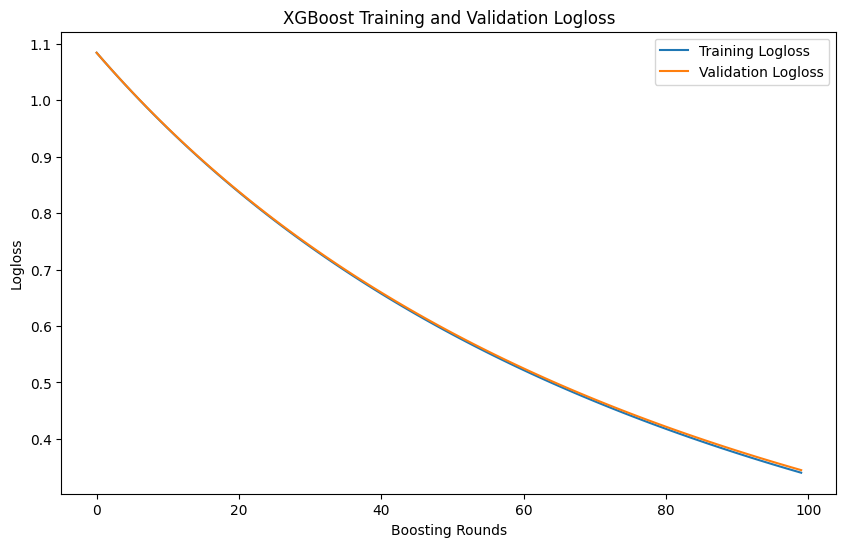

In [176]:
train_logloss = results['validation_0']['mlogloss']
val_logloss = results['validation_1']['mlogloss']

epochs = range(len(train_logloss))

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_logloss, label='Training Logloss')
plt.plot(epochs, val_logloss, label='Validation Logloss')
plt.title('XGBoost Training and Validation Logloss')
plt.xlabel('Boosting Rounds')
plt.ylabel('Logloss')
plt.legend()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The training data was successfully split into training and validation sets, with the validation set comprising 20% of the original training data.
*   The XGBoost model was trained with `mlogloss` as the evaluation metric, and the training history, including performance on both training and validation sets, was captured.
*   The evaluation results, specifically the 'mlogloss' values for both training and validation sets across boosting rounds, were successfully extracted.
*   A plot was generated showing the training and validation logloss over the boosting rounds.

### Insights or Next Steps

*   Analyze the generated logloss plot to assess the model's performance and identify potential overfitting or underfitting based on the convergence and separation of the training and validation curves.
*   Based on the plot analysis, consider adjusting hyperparameters such as `learning_rate`, `n_estimators`, or adding early stopping to improve model performance and generalization.
